# Time Series Forescasting

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [28]:
sales = pd.read_csv('sales-cars.csv')
sales.head()

,Month,Sales
0,2016-01,266
1,2016-02,146
2,2016-03,183
3,2016-04,119
4,2016-05,180


In [31]:
def parser(x):
    return pd.datetime.strptime(x,'%Y-%m')

### Parse the dates and make MONTH column as Index

In [86]:
sales = pd.read_csv('sales-cars.csv',index_col=0, parse_dates=[0],date_parser=parser)

In [87]:
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [88]:
sales.describe()

,Sales
count,36.00000
mean,295.75000
std,117.81908
min,119.00000
25%,192.50000
50%,280.00000
75%,402.75000
max,520.00000


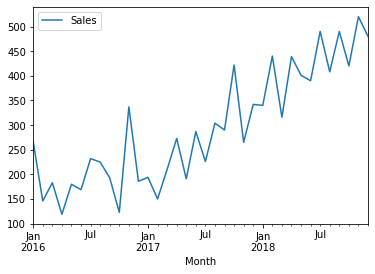

In [89]:
#plotting the sales data and we see the upward Trend and little bit of seasonality.
sales.plot() 

Use seasonal_decompose to observe the seasonality and trend.

<Figure size 432x288 with 0 Axes>

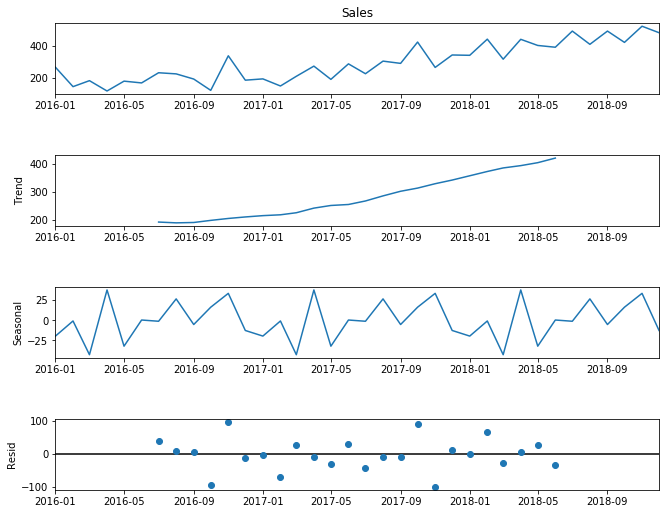

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
# run a ETF decompose to confirm seasonality
result = seasonal_decompose(sales['Sales'], model='add', freq=12)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(10,8)

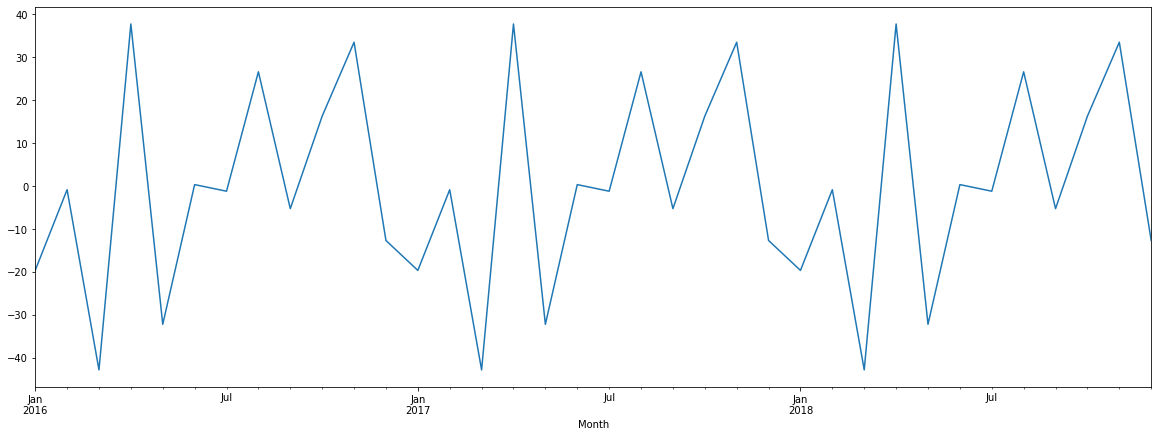

In [77]:
# plot seasonality
result.seasonal.plot(figsize=(20,7))

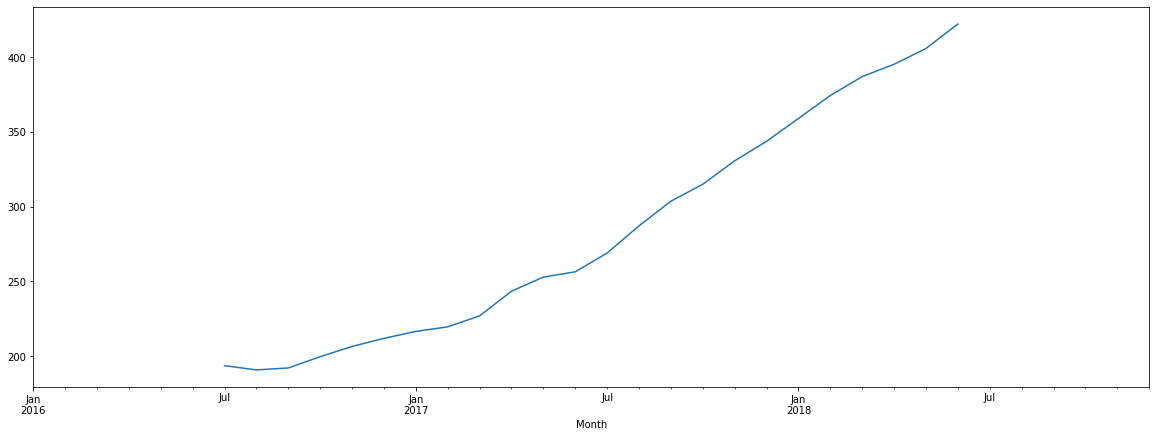

In [78]:
# plot seasonality
result.trend.plot(figsize=(20,7))

Apply adf test to check for sationary.

In [37]:
from statsmodels.tsa.stattools import adfuller
#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")    

In [38]:
test_result=adfuller_test(sales['Sales'])

ADF Test Statistic : 1.6368831572690297
p-value : 0.9979641164504948
#Lags Used : 10
Number of Observations Used : 25
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [90]:
#Since data is not stationary, get the difference to make it stationary
sales['Sales First Difference'] = sales['Sales'] - sales['Sales'].shift(1)
sales['Seasonal First Difference'] = sales['Sales'] - sales['Sales'].shift(12)
sales.head(15)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
2016-01-01,266,NaN,NaN
2016-02-01,146,-120.0,NaN
2016-03-01,183,37.0,NaN
2016-04-01,119,-64.0,NaN
2016-05-01,180,61.0,NaN
2016-06-01,169,-11.0,NaN
2016-07-01,232,63.0,NaN
2016-08-01,225,-7.0,NaN
2016-09-01,193,-32.0,NaN


In [40]:
#apply adf test again to check for stationary
adfuller_test(sales['Sales First Difference'].dropna())
adfuller_test(sales['Seasonal First Difference'].dropna())

ADF Test Statistic : -1.383201254047565
p-value : 0.5903026282170537
#Lags Used : 10
Number of Observations Used : 24
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
ADF Test Statistic : -3.5836479232207923
p-value : 0.00608145041278499
#Lags Used : 8
Number of Observations Used : 15
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


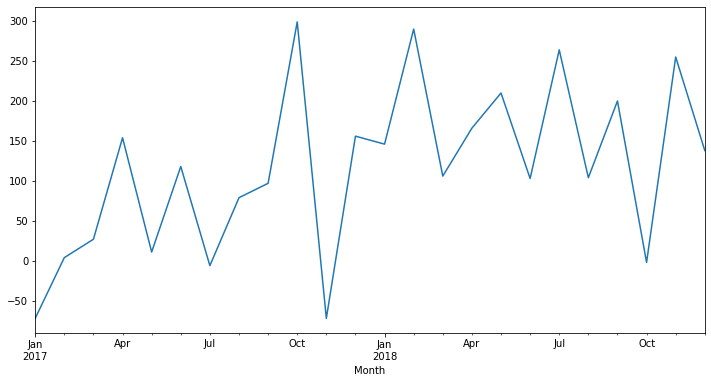

In [41]:
sales['Seasonal First Difference'].dropna().plot(figsize=(12,6))

In [42]:
sales

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
2016-01-01,266,NaN,NaN
2016-02-01,146,-120.0,NaN
2016-03-01,183,37.0,NaN
2016-04-01,119,-64.0,NaN
2016-05-01,180,61.0,NaN
2016-06-01,169,-11.0,NaN
2016-07-01,232,63.0,NaN
2016-08-01,225,-7.0,NaN
2016-09-01,193,-32.0,NaN


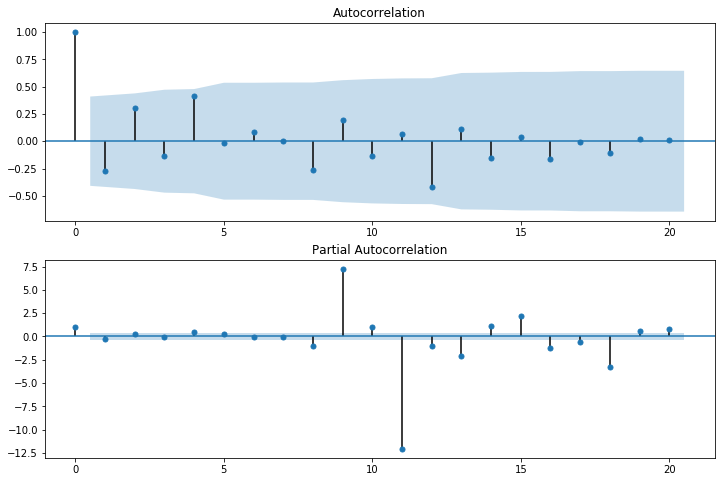

In [43]:
#plot acf and pacf graphs to get the values of p(AR) and q(MA) before we apply the ARIMA/SARIMA model
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(sales['Seasonal First Difference'].iloc[13:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(sales['Seasonal First Difference'].iloc[13:],lags=20,ax=ax2)

### Parameters by Auto Arima function suggesting SARIMA model

In [79]:
from pmdarima import auto_arima
# run auto_arima
auto_arima(sales['Seasonal First Difference'].dropna(), seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   24
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood                -132.011
Date:                             Fri, 27 Mar 2020   AIC                            274.023
Time:                                     00:04:03   BIC                            279.700
Sample:                                          0   HQIC                           275.451
                                              - 24                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     12.1744      6.819      1.785      0.074      -1.190      25.539
ar.L1         -0.5342      0.391     -1.365      0.172      -1.301       0.233
ma.L1         -0.9903      6.638     -0.149      0.881     -14.001      12.020
ar.S.L12      -0.8090      0.237     -3.420      0.001      -1.273      -0.345
sigma2      2658.4449   1.62e+04      0.164      0.869    -2.9e+04    3.44e+04
===================================================================================
Ljung-Box (Q):                        9.80   Jarque-Bera (JB):                 2.17
Prob(Q):                              0.99   Prob(JB):                         0.34
Heteroskedasticity (H):               1.03   Skew:                             0.72
Prob(H) (two-sided):                  0.96   Kurtosis:                         3.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Trying ARIMA model.

In [44]:
from statsmodels.tsa.arima_model import ARIMA

In [45]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(sales['Sales'],order=(1, 1, 1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

389.09962967887293


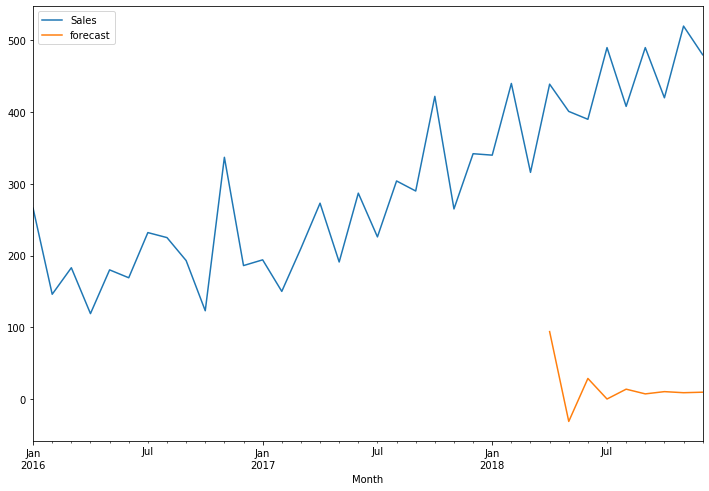

In [46]:
sales['forecast']=model_arima_fit.predict(start=27,end=36,dynamic=True)
sales[['Sales','forecast']].plot(figsize=(12,8))

# Trying SARIMA model.

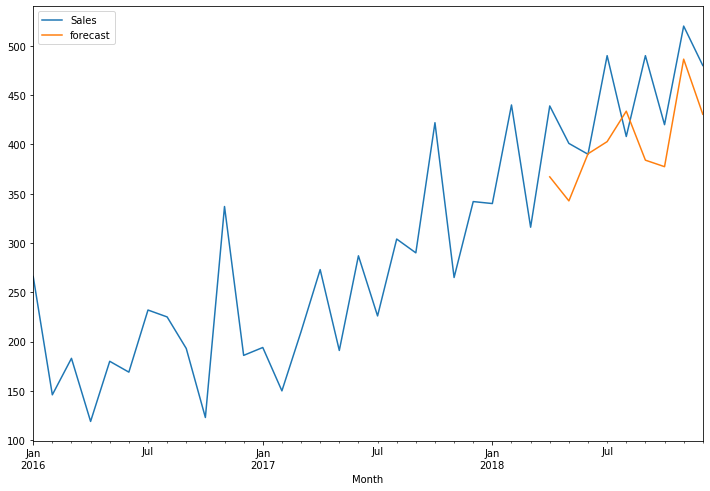

In [80]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(sales['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
results=model.fit()
sales['forecast']=results.predict(start=27,end=36,dynamic=True)
sales[['Sales','forecast']].plot(figsize=(12,8))

In [81]:
#Create a data fro next 24 months so that we can forecast or predit using the model
from pandas.tseries.offsets import DateOffset
future_dates=[sales.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=sales.columns)
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
2020-07-01,NaN,NaN,NaN,NaN
2020-08-01,NaN,NaN,NaN,NaN
2020-09-01,NaN,NaN,NaN,NaN
2020-10-01,NaN,NaN,NaN,NaN
2020-11-01,NaN,NaN,NaN,NaN


In [82]:
future_df=pd.concat([sales,future_datest_df])

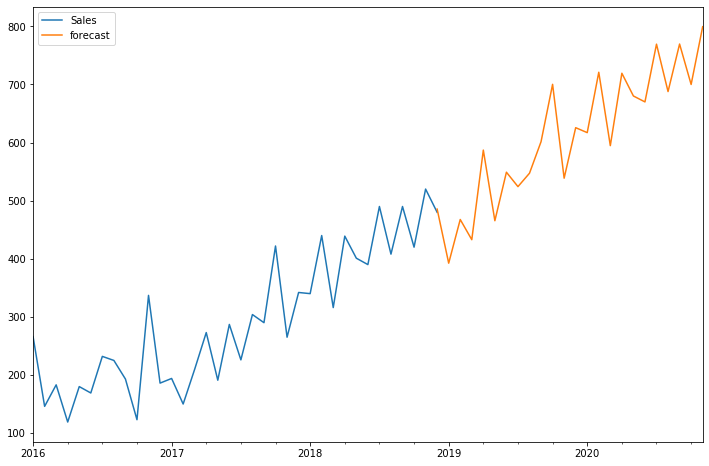

In [83]:
#Plotting the forecast along with original values
future_df['forecast'] = results.predict(start = 35, end = 60, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 

In [84]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [ ]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = sm.tsa.statespace.SARIMAX(sales['Sales'],order=param,seasonal_order=(param + (12,)))
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

# import warnings
# warnings.filterwarnings('ignore')
# for param in pdq:
#     try:
#         model_arima = ARIMA(train,order=param)
#         model_arima_fit = model_arima.fit()
#         print(param,model_arima_fit.aic)
#     except:
#         continue
    

(0, 0, 0) 518.9741997381224
(0, 0, 1) 487.9066545076954
(0, 0, 2) 467.82857176870044
(0, 0, 3) 465.68532209014455
(0, 0, 4) 472.2393164051771
(0, 1, 0) 299.6020780978783
(0, 1, 1) 280.4228109172441
(0, 1, 2) 275.14761501651157
(0, 1, 3) 278.30662329529474
(0, 1, 4) 281.78448295258045
(0, 2, 0) 157.1360130296337
(0, 2, 1) 148.67287327560618
(0, 2, 2) 144.64427769957527
(0, 2, 3) nan
(0, 2, 4) 149.99859816874533
(0, 3, 0) 2.0
(0, 3, 1) 6.0
(0, 3, 2) 10.0
(0, 3, 3) 14.0
(0, 3, 4) 18.0
(0, 4, 0) 2.0
(0, 4, 1) 6.0
(0, 4, 2) 10.0
(0, 4, 3) 14.0
(0, 4, 4) 18.0
(1, 0, 0) 422.6141266214433
(1, 0, 1) 413.81142721014595
(1, 0, 2) 408.24319919790173
(1, 0, 3) 409.9149561781155
(1, 0, 4) 411.83452185737735
(1, 1, 0) 277.41882480677685
(1, 1, 1) 276.73474208621275
(1, 1, 2) 284.0885231955299
(1, 1, 3) 282.98943478572994
(1, 1, 4) 282.90656072892136
(1, 2, 0) 144.27808831779208
(1, 2, 1) 143.53094437963128
(1, 2, 2) 146.2808208067133
(1, 3, 0) 6.0
(1, 3, 1) 10.0
(1, 3, 2) 14.0
(1, 3, 3) 18.0
(1, 3, 4